<a href="https://colab.research.google.com/github/smwalter96/PUS2020_MWalter/blob/master/HW7/Pus20_midterm_MatthewWalter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install census
!pip install CensusData

In [2]:
!pip install mapclassify

In [3]:
!pip install geopandas
!pip install descartes

In [4]:
!pip install us

In [5]:
import pandas as pd
import numpy as np
import pylab as plt
import geopandas as gpd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
myAPIkey =  pd.read_csv("/content/drive/My Drive/myapis.csv")["census"]

In [7]:
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)

In [8]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B01003')), 

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01003_001E  | TOTAL POPULATION               | !! Estimate Total                                        | int  
-------------------------------------------------------------------------------------------------------------------


(None,)

In [9]:

st = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)
st

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [10]:
st = ['01','04','05','06','08','09','10','11','12','13','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','44','45','46','47','48','49','50','51','53','54','55','56']

In [11]:
pop18 = pd.DataFrame()

for i in st:
  pop18 = pop18.append(censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', i), 
                                                   ('tract', '*')]),
                             ["B01003_001E"]))

In [12]:
pop18.rename({'B01003_001E': 'pop'}, axis=1, inplace=True)
pop18

,pop
"Census Tract 57.01, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:005701",2462
"Census Tract 107.04, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:010704",4993
"Census Tract 129.08, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:012908",6048
"Census Tract 53.02, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:005302",3628
"Census Tract 111.07, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:011107",11535
...,...
"Census Tract 5.02, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000502",2720
"Census Tract 9.02, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000902",3833
"Census Tract 17, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:001700",5047
"Census Tract 3, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000300",4332


In [13]:
def gettract(cname):
  return cname.split(',')[0]
pop18["name"] = pop18.index.astype(str).map(gettract)

def gettract(cname):
  return cname.split(':')[3]
pop18["state"] = pop18.index.astype(str).map(gettract)

def gettract(cname):
  return cname.split(':')[4]
pop18["county"] = pop18.index.astype(str).map(gettract)

pop18.sort_values('name')

,pop,name,state,county
"Census Tract 1, Columbia County, New York: Summary level: 140, state:36> county:021> tract:000100",2221,Census Tract 1,36> county,021> tract
"Census Tract 1, Routt County, Colorado: Summary level: 140, state:08> county:107> tract:000100",2155,Census Tract 1,08> county,107> tract
"Census Tract 1, Lincoln County, Montana: Summary level: 140, state:30> county:053> tract:000100",3345,Census Tract 1,30> county,053> tract
"Census Tract 1, Powder River County, Montana: Summary level: 140, state:30> county:075> tract:000100",1619,Census Tract 1,30> county,075> tract
"Census Tract 1, Musselshell County, Montana: Summary level: 140, state:30> county:065> tract:000100",2717,Census Tract 1,30> county,065> tract
...,...,...,...,...
"Census Tract 999.02, Orange County, California: Summary level: 140, state:06> county:059> tract:099902",4414,Census Tract 999.02,06> county,059> tract
"Census Tract 999.03, Orange County, California: Summary level: 140, state:06> county:059> tract:099903",5661,Census Tract 999.03,06> county,059> tract
"Census Tract 999.04, Orange County, California: Summary level: 140, state:06> county:059> tract:099904",6542,Census Tract 999.04,06> county,059> tract
"Census Tract 999.05, Orange County, California: Summary level: 140, state:06> county:059> tract:099905",4252,Census Tract 999.05,06> county,059> tract


In [14]:
pop18['state1'] = pop18['state'].str.extract('(\d+)').astype(int)
pop18['county1'] = pop18['county'].str.extract('(\d+)').astype(int)
pop18["MATCH1"] = pop18["state1"].astype(str) + pop18["name"] + pop18['county1'].astype(str)
pop18.sort_values('MATCH1')

,pop,name,state,county,state1,county1,MATCH1
"Census Tract 101.01, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010101",4019,Census Tract 101.01,10> county,003> tract,10,3,10Census Tract 101.013
"Census Tract 101.04, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010104",3452,Census Tract 101.04,10> county,003> tract,10,3,10Census Tract 101.043
"Census Tract 102, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010200",2157,Census Tract 102,10> county,003> tract,10,3,10Census Tract 1023
"Census Tract 103, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010300",3220,Census Tract 103,10> county,003> tract,10,3,10Census Tract 1033
"Census Tract 104, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010400",4697,Census Tract 104,10> county,003> tract,10,3,10Census Tract 1043
...,...,...,...,...,...,...,...
"Census Tract 9800, Hartford County, Connecticut: Summary level: 140, state:09> county:003> tract:980000",0,Census Tract 9800,09> county,003> tract,9,3,9Census Tract 98003
"Census Tract 9900, Fairfield County, Connecticut: Summary level: 140, state:09> county:001> tract:990000",0,Census Tract 9900,09> county,001> tract,9,1,9Census Tract 99001
"Census Tract 9900, New Haven County, Connecticut: Summary level: 140, state:09> county:009> tract:990000",0,Census Tract 9900,09> county,009> tract,9,9,9Census Tract 99009
"Census Tract 9901, New London County, Connecticut: Summary level: 140, state:09> county:011> tract:990100",0,Census Tract 9901,09> county,011> tract,9,11,9Census Tract 990111


In [15]:
cd /content/drive/My Drive/acs_2018

/content/drive/My Drive/acs_2018


In [16]:
import urllib, os
for i in st:
    os.system('wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_%s_tract.zip' % i)


In [17]:
import zipfile
dir_name = '/content/drive/My Drive/acs_2018'
extension = ".zip"

os.chdir(dir_name) 
for item in os.listdir(dir_name):
    if item.endswith(extension): 
        file_name = os.path.abspath(item) 
        zip_ref = zipfile.ZipFile(file_name) 
        zip_ref.extractall(dir_name) 
        zip_ref.close() 
        os.remove(file_name) 

In [18]:
from pathlib import Path
folder = Path('/content/drive/My Drive/acs_2018')

gdf = pd.concat([
    gpd.read_file(shp)
    for shp in folder.glob("*.shp")
]).pipe(gpd.GeoDataFrame)

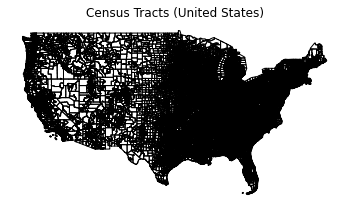

In [57]:
f, ax = plt.subplots(1)
ax = gdf.plot(color="None", edgecolor='k', ax=ax)
ax.set_axis_off()
plt.title('Census Tracts (United States)')
plt.show()

Figure 1: A map of all the census tracts in the contiguous United States for the 2018 American Community Survey.

In [20]:
gdf['state1'] = gdf['STATEFP'].str.extract('(\d+)').astype(int)
gdf['county1'] = gdf['COUNTYFP'].str.extract('(\d+)').astype(int)
gdf["MATCH"] = gdf["state1"].astype(str) + gdf["NAMELSAD"] + gdf['county1'].astype(str)
gdf.sort_values('MATCH')

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop,name_x,state_x,county_x,state1_y,county1_y,MATCH1_x,area,pdensity,w_pop,b_pop,a_pop,age,income,name_y,state_y,county_y,state1,county1,MATCH1_y
65,10,003,010101,10003010101,101.01,Census Tract 101.01,G5020,S,2785379,0,+39.8139503,-075.4530991,"POLYGON ((-75.46947 39.81422, -75.46846 39.815...",NaN,NaN,10Census Tract 101.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
12,10,003,010104,10003010104,101.04,Census Tract 101.04,G5020,S,3629091,2863836,+39.7961063,-075.4534792,"POLYGON ((-75.47421 39.78841, -75.47409 39.788...",NaN,NaN,10Census Tract 101.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
66,10,003,010200,10003010200,102,Census Tract 102,G5020,S,939935,0,+39.8087548,-075.4682701,"POLYGON ((-75.47606 39.80850, -75.47532 39.809...",NaN,NaN,10Census Tract 1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
100,10,003,010300,10003010300,103,Census Tract 103,G5020,S,1832184,0,+39.8024262,-075.4675404,"POLYGON ((-75.48088 39.80435, -75.48065 39.804...",NaN,NaN,10Census Tract 1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
71,10,003,010400,10003010400,104,Census Tract 104,G5020,S,2402622,0,+39.7932234,-075.4802454,"POLYGON ((-75.49045 39.79328, -75.49039 39.793...",NaN,NaN,10Census Tract 1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,09,003,980000,09003980000,9800,Census Tract 9800,G5020,S,6516085,0,+41.9373326,-072.6864928,"POLYGON ((-72.70919 41.92936, -72.70887 41.930...",NaN,NaN,9Census Tract 98003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3,NaN
529,09,001,990000,09001990000,9900,Census Tract 9900,G5020,S,0,424164840,+41.0600924,-073.2933677,"POLYGON ((-73.64983 40.97920, -73.64633 40.986...",NaN,NaN,9Census Tract 99001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1,NaN
649,09,009,990000,09009990000,9900,Census Tract 9900,G5020,S,0,586791386,+41.1861613,-072.8148602,"POLYGON ((-73.10778 41.16860, -73.10724 41.169...",NaN,NaN,9Census Tract 99009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9,NaN
262,09,011,990100,09011990100,9901,Census Tract 9901,G5020,S,0,93371615,+41.2561509,-072.2301607,"POLYGON ((-72.33793 41.27590, -72.33655 41.277...",NaN,NaN,9Census Tract 990111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,11,NaN


In [21]:
popn = gdf.merge(pop18, left_on = 'MATCH', right_on = 'MATCH1')
popn


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop_x,name_x,state_x,county_x,state1_y,county1_y,MATCH1_x,area,pdensity,w_pop,b_pop,a_pop,age,income,name_y,state_y,county_y,state1_x,county1_x,MATCH1_y,pop_y,name,state,county,state1_y,county1_y,MATCH1
0,05,119,003304,05119003304,33.04,Census Tract 33.04,G5020,S,5503991,409051,+34.7875234,-092.2458551,"POLYGON ((-92.26559 34.78090, -92.26543 34.780...",NaN,NaN,5Census Tract 33.04119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,5760,Census Tract 33.04,05> county,119> tract,5,119,5Census Tract 33.04119
1,05,119,003500,05119003500,35,Census Tract 35,G5020,S,25337534,157182,+34.9057432,-092.1382940,"POLYGON ((-92.17812 34.90317, -92.17799 34.907...",NaN,NaN,5Census Tract 35119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,2955,Census Tract 35,05> county,119> tract,5,119,5Census Tract 35119
2,05,119,003607,05119003607,36.07,Census Tract 36.07,G5020,S,5936932,41426,+34.8560069,-092.0865125,"POLYGON ((-92.11033 34.85293, -92.11031 34.853...",NaN,NaN,5Census Tract 36.07119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,5036,Census Tract 36.07,05> county,119> tract,5,119,5Census Tract 36.07119
3,05,119,003608,05119003608,36.08,Census Tract 36.08,G5020,S,4885717,0,+34.8741617,-092.1043791,"POLYGON ((-92.12775 34.86747, -92.12758 34.867...",NaN,NaN,5Census Tract 36.08119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,4827,Census Tract 36.08,05> county,119> tract,5,119,5Census Tract 36.08119
4,05,119,004007,05119004007,40.07,Census Tract 40.07,G5020,S,81229886,6773298,+34.6744189,-092.2153550,"POLYGON ((-92.26900 34.62818, -92.26900 34.628...",NaN,NaN,5Census Tract 40.07119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,2579,Census Tract 40.07,05> county,119> tract,5,119,5Census Tract 40.07119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85126,55,043,960800,55043960800,9608,Census Tract 9608,G5020,S,253210348,15987542,+42.7117441,-090.6232729,"POLYGON ((-90.78594 42.75890, -90.78579 42.759...",NaN,NaN,55Census Tract 960843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,43,NaN,2808,Census Tract 9608,55> county,043> tract,55,43,55Census Tract 960843
85127,55,043,960100,55043960100,9601,Census Tract 9601,G5020,S,364751519,3687082,+43.0851304,-090.5338688,"POLYGON ((-90.65769 43.05224, -90.65765 43.052...",NaN,NaN,55Census Tract 960143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,43,NaN,3899,Census Tract 9601,55> county,043> tract,55,43,55Census Tract 960143
85128,55,043,960500,55043960500,9605,Census Tract 9605,G5020,S,569068167,31186956,+42.8066244,-090.8677346,"POLYGON ((-91.07932 42.82298, -91.07897 42.825...",NaN,NaN,55Census Tract 960543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,43,NaN,3489,Census Tract 9605,55> county,043> tract,55,43,55Census Tract 960543
85129,55,043,961100,55043961100,9611,Census Tract 9611,G5020,S,188421248,10418252,+42.6224241,-090.5534011,"POLYGON ((-90.69007 42.60893, -90.68964 42.609...",NaN,NaN,55Census Tract 961143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,43,NaN,4576,Census Tract 9611,55> county,043> tract,55,43,55Census Tract 961143


In [22]:
pop1  = popn.to_crs({'init': 'epsg:32633'})


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [23]:
pop1["area"] = pop1['geometry'].area/ 10**6
pop1['pdensity'] = pop1['pop_x'] / pop1['area']
pop1

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop_x,name_x,state_x,county_x,state1_y,county1_y,MATCH1_x,area,pdensity,w_pop,b_pop,a_pop,age,income,name_y,state_y,county_y,state1_x,county1_x,MATCH1_y,pop_y,name,state,county,state1_y,county1_y,MATCH1
0,05,119,003304,05119003304,33.04,Census Tract 33.04,G5020,S,5503991,409051,+34.7875234,-092.2458551,"POLYGON ((-6237916.423 12567721.389, -6237918....",NaN,NaN,5Census Tract 33.04119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.293727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,5760,Census Tract 33.04,05> county,119> tract,5,119,5Census Tract 33.04119
1,05,119,003500,05119003500,35,Census Tract 35,G5020,S,25337534,157182,+34.9057432,-092.1382940,"POLYGON ((-6224823.607 12546066.592, -6224123....",NaN,NaN,5Census Tract 35119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.764371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,2955,Census Tract 35,05> county,119> tract,5,119,5Census Tract 35119
2,05,119,003607,05119003607,36.07,Census Tract 36.07,G5020,S,5936932,41426,+34.8560069,-092.0865125,"POLYGON ((-6237420.414 12541516.346, -6237373....",NaN,NaN,5Census Tract 36.07119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.462450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,5036,Census Tract 36.07,05> county,119> tract,5,119,5Census Tract 36.07119
3,05,119,003608,05119003608,36.08,Census Tract 36.08,G5020,S,4885717,0,+34.8741617,-092.1043791,"POLYGON ((-6233925.624 12542551.207, -6233893....",NaN,NaN,5Census Tract 36.08119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.624467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,4827,Census Tract 36.08,05> county,119> tract,5,119,5Census Tract 36.08119
4,05,119,004007,05119004007,40.07,Census Tract 40.07,G5020,S,81229886,6773298,+34.6744189,-092.2153550,"POLYGON ((-6261664.499 12581165.554, -6261644....",NaN,NaN,5Census Tract 40.07119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.827189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,119,NaN,2579,Census Tract 40.07,05> county,119> tract,5,119,5Census Tract 40.07119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85126,55,043,960800,55043960800,9608,Census Tract 9608,G5020,S,253210348,15987542,+42.7117441,-090.6232729,"POLYGON ((-5117580.056 11822074.217, -5117516....",NaN,NaN,55Census Tract 960843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537.372369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,43,NaN,2808,Census Tract 9608,55> county,043> tract,55,43,55Census Tract 960843
85127,55,043,960100,55043960100,9601,Census Tract 9601,G5020,S,364751519,3687082,+43.0851304,-090.5338688,"POLYGON ((-5080778.789 11790963.405, -5080723....",NaN,NaN,55Census Tract 960143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.657753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,43,NaN,3899,Census Tract 9601,55> county,043> tract,55,43,55Census Tract 960143
85128,55,043,960500,55043960500,9605,Census Tract 9605,G5020,S,569068167,31186956,+42.8066244,-090.8677346,"POLYGON ((-5095266.618 11849395.700, -5094968....",NaN,NaN,55Census Tract 960543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1191.773237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,43,NaN,3489,Census Tract 9605,55> county,043> tract,55,43,55Census Tract 960543
85129,55,043,961100,55043961100,9611,Census Tract 9611,G5020,S,188421248,10418252,+42.6224241,-090.5534011,"POLYGON ((-5143571.300 11820823.799, -5143505....",NaN,NaN,55Census Tract 961143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398.193601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,43,NaN,4576,Census Tract 9611,55> county,043> tract,55,43,55Census Tract 961143


In [24]:
urban_centers = pop1.loc[(pop1['pdensity'] >= 1500) & (pop1['pop_x'] >= 2500)] 

urban_centers

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop_x,name_x,state_x,county_x,state1_y,county1_y,MATCH1_x,area,pdensity,w_pop,b_pop,a_pop,age,income,name_y,state_y,county_y,state1_x,county1_x,MATCH1_y,pop_y,name,state,county,state1_y,county1_y,MATCH1
691,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-3922374.804 15051851.547, -3922503....",6.0,37.0,6Census Tract 139237,5840.0,Census Tract 1392,06> county,037> tract,6.0,37.0,6Census Tract 139237,1.800406,3243.713537,4486.0,153.0,840.0,38.8,67420.0,Census Tract 1392,06> county,037> tract,6,37,6Census Tract 139237,5840,Census Tract 1392,06> county,037> tract,6,37,6Census Tract 139237
693,06,067,002300,06067002300,23,Census Tract 23,G5020,S,1213095,0,+38.5571708,-121.4938311,"POLYGON ((-3341674.591 14709248.890, -3341666....",6.0,67.0,6Census Tract 2367,3342.0,Census Tract 23,06> county,067> tract,6.0,67.0,6Census Tract 2367,1.708148,1956.505438,2643.0,70.0,194.0,45.5,115071.0,Census Tract 23,06> county,067> tract,6,67,6Census Tract 2367,3342,Census Tract 23,06> county,067> tract,6,67,6Census Tract 2367
696,06,037,143200,06037143200,1432,Census Tract 1432,G5020,S,957093,0,+34.1494399,-118.3720618,"POLYGON ((-3939283.778 15046022.762, -3939297....",6.0,37.0,6Census Tract 143237,4210.0,Census Tract 1432,06> county,037> tract,6.0,37.0,6Census Tract 143237,1.500552,2805.634709,2849.0,385.0,260.0,36.3,74063.0,Census Tract 1432,06> county,037> tract,6,37,6Census Tract 143237,4210,Census Tract 1432,06> county,037> tract,6,37,6Census Tract 143237
698,06,037,143300,06037143300,1433,Census Tract 1433,G5020,S,1649223,5619,+34.1521830,-118.3866139,"POLYGON ((-3937298.414 15046636.011, -3937408....",6.0,37.0,6Census Tract 143337,6730.0,Census Tract 1433,06> county,037> tract,6.0,37.0,6Census Tract 143337,2.593664,2594.784745,5255.0,477.0,486.0,43.1,87125.0,Census Tract 1433,06> county,037> tract,6,37,6Census Tract 143337,6730,Census Tract 1433,06> county,037> tract,6,37,6Census Tract 143337
700,06,037,201301,06037201301,2013.01,Census Tract 2013.01,G5020,S,866188,0,+34.0882421,-118.1878388,"POLYGON ((-3962605.904 15043139.955, -3962614....",6.0,37.0,6Census Tract 2013.0137,4069.0,Census Tract 2013.01,06> county,037> tract,6.0,37.0,6Census Tract 2013.0137,1.363856,2983.452782,1938.0,8.0,461.0,37.0,46250.0,Census Tract 2013.01,06> county,037> tract,6,37,6Census Tract 2013.0137,4069,Census Tract 2013.01,06> county,037> tract,6,37,6Census Tract 2013.0137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85032,55,079,003200,55079003200,32,Census Tract 32,G5020,S,813096,0,+43.1011585,-088.0011119,"POLYGON ((-5180594.547 11502728.246, -5180424....",55.0,79.0,55Census Tract 3279,2711.0,Census Tract 32,55> county,079> tract,55.0,79.0,55Census Tract 3279,1.640284,1652.762870,386.0,1847.0,384.0,37.2,47159.0,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279,2711,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279
85034,55,079,003300,55079003300,33,Census Tract 33,G5020,S,1471144,0,+43.1010455,-088.0173060,"POLYGON ((-5179878.029 11504994.315, -5179733....",55.0,79.0,55Census Tract 3379,5298.0,Census Tract 33,55> county,079> tract,55.0,79.0,55Census Tract 3379,2.967408,1785.396480,1109.0,3449.0,487.0,30.2,43281.0,Census Tract 33,55> county,079> tract,55,79,55Census Tract 3379,5298,Census Tract 33,55> county,079> tract,55,79,55Census Tract 3379
85064,55,079,005900,55079005900,59,Census Tract 59,G5020,S,850834,0,+43.0682111,-087.9852358,"POLYGON ((-5185560.471 11502745.336, -5185515....",55.0,79.0,55Census Tract 5979,3697.0,Census Tract 59,55> county,079> tract,55.0,79.0,55Census Tract 5979,1.718505,2151.288992,1007.0,2387.0,35.0,28.8,37341.0,Census Tract 59,55> county,079> tract,55,79,55Census Tract 5979,3697,Census Tract 59,

In [25]:
urban_centers  = urban_centers.to_crs({'init': 'epsg:4326'})


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


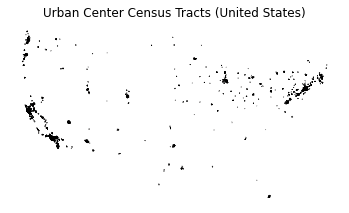

In [26]:
f, ax = plt.subplots(1)
ax = urban_centers.plot(color="r", edgecolor='k', ax=ax)
ax.set_axis_off()
plt.title('Urban Center Census Tracts (United States)')
plt.show()


Figure 2: A map of all urban center census tracts. This was determined as census tracts with population greater or equal to 2500 and a population density greater or equal to 1500 people per square kilometer. Most city centers are seen along the coast lines.

In [27]:
demo = pd.DataFrame()

for i in st:
  demo = demo.append(censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', i), 
                                                   ('tract', '*')]),
                             ["B02001_002E", "B02001_003E", "B02001_005E", "B01002_001E", "B19013_001E"]))

In [28]:
demo.rename({'B02001_002E': 'w_pop', 'B02001_003E': 'b_pop', 'B02001_005E': 'a_pop', 'B01002_001E': 'age', 'B19013_001E': 'income'}, axis=1, inplace=True)
demo

,w_pop,b_pop,a_pop,age,income
"Census Tract 57.01, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:005701",33,2414,0,40.2,34709.0
"Census Tract 107.04, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:010704",3762,908,139,20.7,74776.0
"Census Tract 129.08, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:012908",2573,1793,153,30.1,51176.0
"Census Tract 53.02, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:005302",1932,1513,39,47.4,61148.0
"Census Tract 111.07, Jefferson County, Alabama: Summary level: 140, state:01> county:073> tract:011107",10369,838,29,38.4,85081.0
...,...,...,...,...,...
"Census Tract 5.02, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000502",2578,0,41,39.7,73616.0
"Census Tract 9.02, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000902",3732,32,23,41.3,87500.0
"Census Tract 17, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:001700",4553,110,54,37.0,76705.0
"Census Tract 3, Natrona County, Wyoming: Summary level: 140, state:56> county:025> tract:000300",3944,130,73,35.7,42813.0


In [29]:
def gettract(cname):
  return cname.split(',')[0]
demo["name"] = demo.index.astype(str).map(gettract)

def gettract(cname):
  return cname.split(':')[3]
demo["state"] = demo.index.astype(str).map(gettract)

def gettract(cname):
  return cname.split(':')[4]
demo["county"] = demo.index.astype(str).map(gettract)

demo.sort_values('name')

,w_pop,b_pop,a_pop,age,income,name,state,county
"Census Tract 1, Columbia County, New York: Summary level: 140, state:36> county:021> tract:000100",2124,0,21,50.0,58618.0,Census Tract 1,36> county,021> tract
"Census Tract 1, Routt County, Colorado: Summary level: 140, state:08> county:107> tract:000100",2143,7,0,53.6,74944.0,Census Tract 1,08> county,107> tract
"Census Tract 1, Lincoln County, Montana: Summary level: 140, state:30> county:053> tract:000100",3134,1,26,51.2,39342.0,Census Tract 1,30> county,053> tract
"Census Tract 1, Powder River County, Montana: Summary level: 140, state:30> county:075> tract:000100",1536,0,0,53.0,52457.0,Census Tract 1,30> county,075> tract
"Census Tract 1, Musselshell County, Montana: Summary level: 140, state:30> county:065> tract:000100",2700,0,3,49.6,50101.0,Census Tract 1,30> county,065> tract
...,...,...,...,...,...,...,...,...
"Census Tract 999.02, Orange County, California: Summary level: 140, state:06> county:059> tract:099902",2618,69,1221,36.5,71511.0,Census Tract 999.02,06> county,059> tract
"Census Tract 999.03, Orange County, California: Summary level: 140, state:06> county:059> tract:099903",2557,39,2163,36.5,79583.0,Census Tract 999.03,06> county,059> tract
"Census Tract 999.04, Orange County, California: Summary level: 140, state:06> county:059> tract:099904",2417,61,2864,38.2,46375.0,Census Tract 999.04,06> county,059> tract
"Census Tract 999.05, Orange County, California: Summary level: 140, state:06> county:059> tract:099905",2925,39,676,36.8,70694.0,Census Tract 999.05,06> county,059> tract


In [30]:
demo['state1'] = demo['state'].str.extract('(\d+)').astype(int)
demo['county1'] = demo['county'].str.extract('(\d+)').astype(int)
demo["MATCH1"] = demo["state1"].astype(str) + demo["name"] + demo['county1'].astype(str)
demo = demo[demo['income'] != -666666666.0	]
demo.sort_values('MATCH1')


,w_pop,b_pop,a_pop,age,income,name,state,county,state1,county1,MATCH1
"Census Tract 101.01, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010101",1622,1622,545,34.1,45851.0,Census Tract 101.01,10> county,003> tract,10,3,10Census Tract 101.013
"Census Tract 101.04, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010104",2155,1206,67,36.1,48173.0,Census Tract 101.04,10> county,003> tract,10,3,10Census Tract 101.043
"Census Tract 102, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010200",1530,533,34,46.4,82574.0,Census Tract 102,10> county,003> tract,10,3,10Census Tract 1023
"Census Tract 103, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010300",2138,829,253,38.3,68015.0,Census Tract 103,10> county,003> tract,10,3,10Census Tract 1033
"Census Tract 104, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010400",3527,540,442,38.8,83476.0,Census Tract 104,10> county,003> tract,10,3,10Census Tract 1043
...,...,...,...,...,...,...,...,...,...,...,...
"Census Tract 907, Fairfield County, Connecticut: Summary level: 140, state:09> county:001> tract:090700",4651,149,466,43.0,161774.0,Census Tract 907,09> county,001> tract,9,1,9Census Tract 9071
"Census Tract 9071, Windham County, Connecticut: Summary level: 140, state:09> county:015> tract:907100",4488,98,0,40.5,70968.0,Census Tract 9071,09> county,015> tract,9,15,9Census Tract 907115
"Census Tract 9072, Windham County, Connecticut: Summary level: 140, state:09> county:015> tract:907200",5273,0,244,43.7,63693.0,Census Tract 9072,09> county,015> tract,9,15,9Census Tract 907215
"Census Tract 9073, Windham County, Connecticut: Summary level: 140, state:09> county:015> tract:907300",4304,173,83,43.1,59469.0,Census Tract 9073,09> county,015> tract,9,15,9Census Tract 907315


In [31]:
urban_centers = urban_centers.merge(demo, left_on = 'MATCH', right_on = 'MATCH1')

urban_centers

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,state1_x,county1_x,MATCH,pop_x,name_x,state_x,county_x,state1_y,county1_y,MATCH1_x,area,pdensity,w_pop_x,b_pop_x,a_pop_x,age_x,income_x,name_y,state_y,county_y,state1_x,county1_x,MATCH1_y,pop_y,name_x,state_x,county_x,state1_y,county1_y,MATCH1_x,w_pop_y,b_pop_y,a_pop_y,age_y,income_y,name_y,state_y,county_y,state1,county1,MATCH1_y
0,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",6.0,37.0,6Census Tract 139237,5840.0,Census Tract 1392,06> county,037> tract,6.0,37.0,6Census Tract 139237,1.800406,3243.713537,4486.0,153.0,840.0,38.8,67420.0,Census Tract 1392,06> county,037> tract,6,37,6Census Tract 139237,5840,Census Tract 1392,06> county,037> tract,6,37,6Census Tract 139237,4486,153,840,38.8,67420.0,Census Tract 1392,06> county,037> tract,6,37,6Census Tract 139237
1,06,067,002300,06067002300,23,Census Tract 23,G5020,S,1213095,0,+38.5571708,-121.4938311,"POLYGON ((-121.50218 38.55643, -121.50184 38.5...",6.0,67.0,6Census Tract 2367,3342.0,Census Tract 23,06> county,067> tract,6.0,67.0,6Census Tract 2367,1.708148,1956.505438,2643.0,70.0,194.0,45.5,115071.0,Census Tract 23,06> county,067> tract,6,67,6Census Tract 2367,3342,Census Tract 23,06> county,067> tract,6,67,6Census Tract 2367,2643,70,194,45.5,115071.0,Census Tract 23,06> county,067> tract,6,67,6Census Tract 2367
2,06,037,143200,06037143200,1432,Census Tract 1432,G5020,S,957093,0,+34.1494399,-118.3720618,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",6.0,37.0,6Census Tract 143237,4210.0,Census Tract 1432,06> county,037> tract,6.0,37.0,6Census Tract 143237,1.500552,2805.634709,2849.0,385.0,260.0,36.3,74063.0,Census Tract 1432,06> county,037> tract,6,37,6Census Tract 143237,4210,Census Tract 1432,06> county,037> tract,6,37,6Census Tract 143237,2849,385,260,36.3,74063.0,Census Tract 1432,06> county,037> tract,6,37,6Census Tract 143237
3,06,037,143300,06037143300,1433,Census Tract 1433,G5020,S,1649223,5619,+34.1521830,-118.3866139,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",6.0,37.0,6Census Tract 143337,6730.0,Census Tract 1433,06> county,037> tract,6.0,37.0,6Census Tract 143337,2.593664,2594.784745,5255.0,477.0,486.0,43.1,87125.0,Census Tract 1433,06> county,037> tract,6,37,6Census Tract 143337,6730,Census Tract 1433,06> county,037> tract,6,37,6Census Tract 143337,5255,477,486,43.1,87125.0,Census Tract 1433,06> county,037> tract,6,37,6Census Tract 143337
4,06,037,201301,06037201301,2013.01,Census Tract 2013.01,G5020,S,866188,0,+34.0882421,-118.1878388,"POLYGON ((-118.19304 34.08590, -118.19294 34.0...",6.0,37.0,6Census Tract 2013.0137,4069.0,Census Tract 2013.01,06> county,037> tract,6.0,37.0,6Census Tract 2013.0137,1.363856,2983.452782,1938.0,8.0,461.0,37.0,46250.0,Census Tract 2013.01,06> county,037> tract,6,37,6Census Tract 2013.0137,4069,Census Tract 2013.01,06> county,037> tract,6,37,6Census Tract 2013.0137,1938,8,461,37.0,46250.0,Census Tract 2013.01,06> county,037> tract,6,37,6Census Tract 2013.0137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,55,079,003200,55079003200,32,Census Tract 32,G5020,S,813096,0,+43.1011585,-088.0011119,"POLYGON ((-88.00709 43.09759, -88.00706 43.098...",55.0,79.0,55Census Tract 3279,2711.0,Census Tract 32,55> county,079> tract,55.0,79.0,55Census Tract 3279,1.640284,1652.762870,386.0,1847.0,384.0,37.2,47159.0,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279,2711,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279,386,1847,384,37.2,47159.0,Census Tract 32,55> county,079> tract,55,79,55Census Tract 3279
11396,55,079,003300,55079003300,33,Census Tract 33,G5020,S,1471144,0,+43.1010455,-088.0173060,"POLYGON ((-88.02764 43.09730, -88.02762 43

In [32]:
import ee
import folium
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=3lZ1BpX31hNgKdIseTP1oNsXod9uHOn9qe0IkwJHqqo&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/5QFUzqxU7PMzOpg1aJzkAtzTQUmsm7RLY7YYcCVHtlbqOxGuPqcewuA

Successfully saved authorization token.


In [33]:
### Using Google Earth Engine API, download CSVs of Climate data to Drive

# Bring in states feature collection
fc = ee.FeatureCollection('users/mswalter/urban_centers')
geom = fc.geometry()


### Function to get the yearly average precipitation in each state boundary

      # CSVs will upload to Google Drive through Google Earth Engine servers


# Bring in data
img = ee.ImageCollection("LANDSAT/LC08/C01/T1_32DAY_NDVI")

# Filter date
ndvisum = img.filterDate('2018-01-01','2018-12-31')
ndvisum = ndvisum.sum()
ndvisum = ndvisum.select('NDVI')

# Convert to double
img = ee.Image.toDouble(ndvisum)

# Get sum of precipitation in each region
ndvi = ndvisum.reduceRegions(**{
'reducer': ee.Reducer.mean(),
'collection': fc,
'scale': 30
  })

# Export table to csv in drive
task_config = {
      'fileFormat': 'csv',
      'folder': 'pus_ndvi'
      }
  
task = ee.batch.Export.table(ndvi, 'ndvi_2018_centers', task_config)
task.start()
task.status()

 

  

{'creation_timestamp_ms': 1603156662054,
 'description': 'ndvi_2018_centers',
 'id': 'A5JADI7Y25AWUHKHHE5HPPIW',
 'name': 'projects/earthengine-legacy/operations/A5JADI7Y25AWUHKHHE5HPPIW',
 'start_timestamp_ms': 0,
 'state': 'READY',
 'task_type': 'EXPORT_FEATURES',
 'update_timestamp_ms': 1603156662054}

In [ ]:
from google.colab import files

urban_centers.to_csv('urban_centers.csv')
files.download('urban_centers.csv')

In [35]:
urban_centers.to_file('urban_centers.gpkg',encoding='utf-8')
!cp urban_centers.gpkg "drive/My Drive/"

cp: -r not specified; omitting directory 'urban_centers.gpkg'


Text(0, 0.5, 'Income [$]')

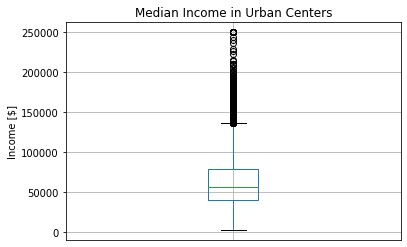

In [36]:
urban_centers.boxplot(column=['income_x'])
plt.title('Median Income in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Income [$]')

Figure 3: Box plot of median income in urban centers. Median is around 50,000 with several positive outliers.

Text(0, 0.5, 'Age')

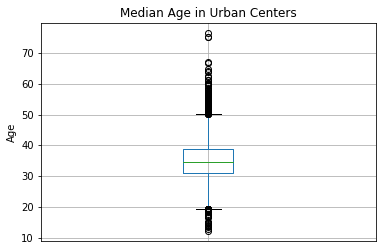

In [37]:
urban_centers.boxplot(column=['age_x'])
plt.title('Median Age in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Age')

Figure 4: Boxplot for median age in urban centers. Median is around 35 with ourliers on both ends.

Text(0, 0.5, 'Total People')

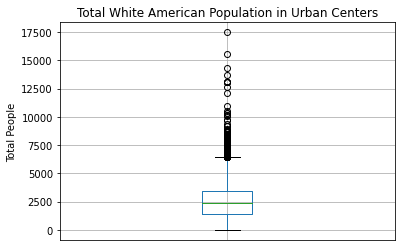

In [38]:
urban_centers.boxplot(column=['w_pop_x'])
plt.title('Total White American Population in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Total People')

Figure 5: Boxplot for total white american population. Average around 2500 with several larger cities shown as the higher outliers.

Text(0, 0.5, 'Total People')

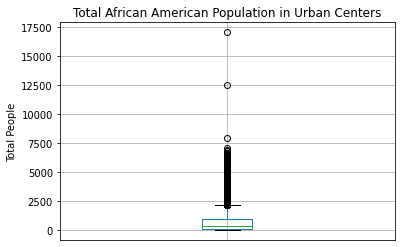

In [39]:
urban_centers.boxplot(column=['b_pop_x'])
plt.title('Total African American Population in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Total People')

Figure 6: Boxplot for african american population in urban centers. Median around 0, showing that some city tracts have no african american population. Several outliers between 2500 and 7500 people.

Text(0, 0.5, 'Total People')

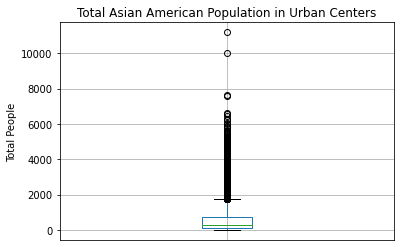

In [40]:
urban_centers.boxplot(column=['a_pop_x'])
plt.title('Total Asian American Population in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Total People')

Figure 7: Boxplot for asian american population in city centers. Median around 0, showing that some city centers have very small asian american populations. Several outliers exist between 2000 and 7000.

In [41]:
ndvi = pd.read_csv('/content/drive/My Drive/ndvi_centers_2018.csv')
ndvi

,system:index,MATCH1_x,mean,.geo
0,00000000000000000710,36Census Tract 251,0.142753,"{""type"":""Polygon"",""coordinates"":[[[-73.7632344..."
1,00000000000000000724,36Census Tract 141,0.267882,"{""type"":""Polygon"",""coordinates"":[[[-73.7774099..."
2,00000000000000000728,36Census Tract 231,0.280484,"{""type"":""Polygon"",""coordinates"":[[[-73.7714168..."
3,00000000000000000fa7,35Census Tract 47.391,0.115336,"{""type"":""Polygon"",""coordinates"":[[[-106.742710..."
4,00000000000000000fa9,35Census Tract 47.481,0.133018,"{""type"":""Polygon"",""coordinates"":[[[-106.752350..."
...,...,...,...,...
11796,00000000000000002d3f,51Census Tract 412760,0.264205,"{""type"":""Polygon"",""coordinates"":[[[-77.4541349..."
11797,00000000000000002d43,51Census Tract 403760,0.170967,"{""type"":""Polygon"",""coordinates"":[[[-77.4565562..."
11798,00000000000000002d44,51Census Tract 404760,0.162836,"{""type"":""Polygon"",""coordinates"":[[[-77.4627721..."
11799,00000000000000002d45,51Census Tract 405760,0.183882,"{""type"":""Polygon"",""coordinates"":[[[-77.4732065..."


In [42]:
urban_centers = urban_centers.merge(ndvi, left_on = 'MATCH', right_on = 'MATCH1_x')

Text(0, 0.5, 'Normalized Difference Vegetation Index')

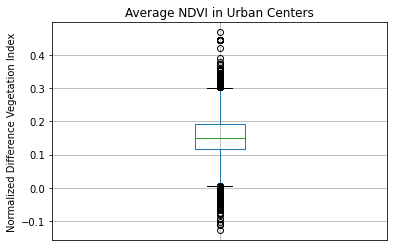

In [44]:
urban_centers.boxplot(column=['mean'])
plt.title('Average NDVI in Urban Centers')
plt.tick_params(axis='x',which='both',bottom=False,top=False, labelbottom=False)
plt.ylabel('Normalized Difference Vegetation Index')

Figure 7: Boxplot for NDVI. Median is around .1, showing there is a good spread of differently vegetated cities, with many outliers above and below the box.

In [45]:
import scipy as sp

In [46]:
centers = urban_centers[['pdensity', 'w_pop_x', 'b_pop_x', 'a_pop_x', 'age_x', 'income_x', 'mean']]
centers = centers.rename({'mean': 'NDVI'}, axis=1)
centers1 = centers.rename({'pdensity': 'Population Density', 'w_pop_x': 'White American Population', 'b_pop_x': 'African American Population', 'a_pop_x': 'Asian American Population', 'age_x': 'Age', 'income_x': 'Income'}, axis=1) 
centers

,pdensity,w_pop_x,b_pop_x,a_pop_x,age_x,income_x,NDVI
0,3243.713537,4486.0,153.0,840.0,38.8,67420.0,0.189282
1,1956.505438,2643.0,70.0,194.0,45.5,115071.0,0.306579
2,2805.634709,2849.0,385.0,260.0,36.3,74063.0,0.170460
3,2594.784745,5255.0,477.0,486.0,43.1,87125.0,0.199474
4,2983.452782,1938.0,8.0,461.0,37.0,46250.0,0.198661
...,...,...,...,...,...,...,...
17971,1652.762870,386.0,1847.0,384.0,37.2,47159.0,0.239302
17972,1785.396480,1109.0,3449.0,487.0,30.2,43281.0,0.234258
17973,2151.288992,1007.0,2387.0,35.0,28.8,37341.0,0.217460
17974,2287.827351,411.0,2504.0,51.0,28.3,24266.0,0.244101


In [47]:
centers1.corr()

,Population Density,White American Population,African American Population,Asian American Population,Age,Income,NDVI
Population Density,1.000000,-0.130584,0.228696,0.007923,-0.064334,-0.100580,-0.367926
White American Population,-0.130584,1.000000,-0.454426,0.113390,0.093325,0.365880,0.132601
African American Population,0.228696,-0.454426,1.000000,-0.183013,-0.131463,-0.343772,-0.136300
Asian American Population,0.007923,0.113390,-0.183013,1.000000,0.215440,0.300823,0.031752
Age,-0.064334,0.093325,-0.131463,0.215440,1.000000,0.503350,0.051456
Income,-0.100580,0.365880,-0.343772,0.300823,0.503350,1.000000,0.144404
NDVI,-0.367926,0.132601,-0.136300,0.031752,0.051456,0.144404,1.000000


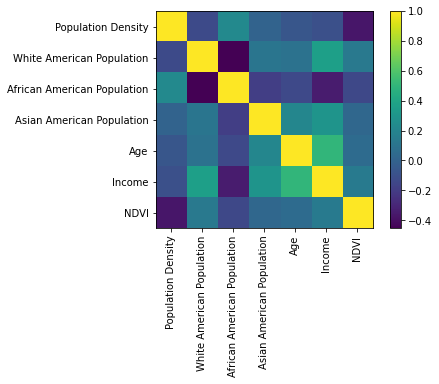

In [48]:
plt.imshow(centers1.corr())
plt.xticks(range(len(centers1.corr())), centers1.corr().columns, rotation='vertical')
plt.yticks(range(len(centers1.corr())), centers1.corr().columns)
plt.colorbar();

Figure 8: Correlation plot for NDVI and socioeconomic variables. Income and age show the highest correlation. NDVI does have a small correlation with the socioeconomic variables.

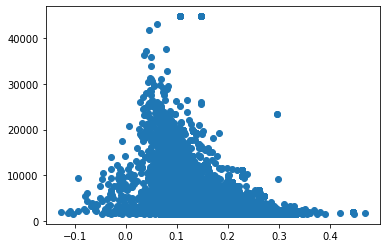

In [49]:
plt.plot(centers['NDVI'], centers['pdensity'], 'o')


Figure 8: Plot of NDVI by population density. A trend can be seen in which high and low NDVI have low population density while median NDVI has high population density.

In [50]:
centers1.describe()

,Population Density,White American Population,African American Population,Asian American Population,Age,Income,NDVI
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,4751.474335,2409.525367,888.882621,524.723186,35.200056,60730.399310,0.154804
std,4541.903102,1610.242025,1131.142512,756.484008,6.166211,32843.207361,0.058402
min,1500.069075,0.000000,0.000000,0.000000,12.300000,2499.000000,-0.127090
25%,2074.021746,1195.000000,129.000000,64.000000,31.300000,37097.000000,0.117239
50%,3110.147373,2217.000000,395.000000,241.500000,34.700000,53459.000000,0.149585
75%,5752.389882,3358.250000,1260.000000,654.000000,39.300000,76250.000000,0.191364
max,44849.213196,17489.000000,17050.000000,11188.000000,76.500000,250001.000000,0.469116


Health Data

In [51]:
health = pd.read_csv('/content/drive/My Drive/health_data.csv')
health

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,BINGE_Crude95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,BPMED_CrudePrev,BPMED_Crude95CI,CANCER_CrudePrev,CANCER_Crude95CI,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CHD_CrudePrev,CHD_Crude95CI,CHECKUP_CrudePrev,CHECKUP_Crude95CI,CHOLSCREEN_CrudePrev,CHOLSCREEN_Crude95CI,COLON_SCREEN_CrudePrev,COLON_SCREEN_Crude95CI,COPD_CrudePrev,COPD_Crude95CI,COREM_CrudePrev,COREM_Crude95CI,COREW_CrudePrev,COREW_Crude95CI,CSMOKING_CrudePrev,CSMOKING_Crude95CI,DENTAL_CrudePrev,DENTAL_Crude95CI,DIABETES_CrudePrev,DIABETES_Crude95CI,HIGHCHOL_CrudePrev,HIGHCHOL_Crude95CI,KIDNEY_CrudePrev,KIDNEY_Crude95CI,LPA_CrudePrev,LPA_Crude95CI,MAMMOUSE_CrudePrev,MAMMOUSE_Crude95CI,MHLTH_CrudePrev,MHLTH_Crude95CI,OBESITY_CrudePrev,OBESITY_Crude95CI,PAPTEST_CrudePrev,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",10.3,"( 9.8, 10.7)",47.7,"(46.6, 48.8)",77.8,"(77.0, 78.6)",5.3,"( 5.0, 5.5)",13.4,"(12.7, 14.3)",7.8,"( 7.3, 8.3)",74.8,"(74.1, 75.5)",78.6,"(77.1, 80.0)",56.8,"(53.5, 59.9)",11.3,"(10.1, 12.5)",29.7,"(25.5, 34.3)",23.2,"(20.4, 26.1)",27.9,"(25.3, 30.6)",42.8,"(39.4, 46.0)",17.4,"(16.6, 18.3)",35.3,"(34.5, 36.2)",4.3,"( 4.0, 4.5)",44.0,"(41.4, 46.5)",82.8,"(80.2, 84.7)",20.5,"(18.9, 22.1)",46.4,"(45.2, 47.5)",85.0,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",10.5,"(10.1, 10.9)",48.2,"(47.1, 49.3)",78.5,"(77.6, 79.3)",4.7,"( 4.6, 4.8)",12.5,"(11.7, 13.3)",8.6,"( 7.9, 9.3)",72.1,"(71.4, 72.8)",76.0,"(74.6, 77.4)",53.8,"(49.7, 57.8)",11.9,"(10.6, 13.2)",26.4,"(22.2, 31.0)",20.9,"(17.7, 25.0)",29.3,"(26.5, 32.0)",39.7,"(36.3, 43.5)",19.8,"(18.6, 20.9)",36.8,"(35.9, 37.7)",4.6,"( 4.3, 4.9)",47.5,"(44.9, 49.9)",83.2,"(80.4, 85.7)",21.2,"(19.6, 22.7)",47.8,"(46.6, 48.9)",83.8,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",10.4,"( 9.9, 11.0)",49.1,"(47.8, 50.4)",79.4,"(78.5, 80.3)",5.3,"( 5.2, 5.5)",13.3,"(12.4, 14.4)",7.5,"( 6.9, 8.2)",76.6,"(75.8, 77.4)",80.2,"(78.5, 82.0)",59.7,"(55.2, 63.9)",10.5,"( 9.2, 12.0)",28.0,"(23.3, 33.4)",23.2,"(19.6, 27.0)",25.9,"(22.8, 29.0)",44.1,"(40.0, 48.0)",18.4,"(17.3, 19.6)",35.6,"(34.5, 36.6)",4.2,"( 4.0, 4.5)",43.0,"(40.0, 45.9)",83.5,"(80.6, 85.9)",18.8,"(17.1, 20.7)",45.7,"(44.3, 46.9)",84.6,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",9.1,"( 8.6, 9.6)",54.1,"(52.7, 55.3)",82.1,"(81.3, 82.9)",6.0,"( 5.8, 6.3)",13.6,"(12.7, 14.7)",9.6,"( 8.7, 10.6)",78.2,"(77.4, 78.9)",80.5,"(78.7, 82.1)",57.9,"(53.4, 62.0)",12.3,"(10.7, 14.0)",24.4,"(18.9, 30.5)",19.8,"(16.0, 23.8)",26.3,"(23.0, 29.4)",39.4,"(35.3, 43.8)",22.4,"(21.1, 23.8)",38.4,"(37.2, 39.5)",5.3,"( 4.9, 5.7)",45.9,"(42.6, 48.9)",83.8,"(81.1, 86.3)",19.4,"(17.7, 21.2)",48.0,"(46.5, 49.3)",84.3,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",7.6,"( 7.1, 8.2)",56.5,"(55.1, 57.8)",81.8,"(80.8, 82.7)",5.9,"( 5.7, 6.2)",14.7,"(13.6, 16.0)",11.4,"(10.4, 12.5)",78.1,"(77.0, 79.1)",77.4,"(75.2, 79.6)",53.2,"(48.8, 57.4)",14.8,"(12.9, 16.8)",21.9,"(16.8, 27.7)",16.7,"(13.3, 20.6)",30.9,"(26.9, 34.5)",

In [52]:
# Arthritis = ARTHRITIS_CrudePrev, Binge drinking = BINGE_CrudePrev, high blood pressure = BPHIGH_CrudePrev, cancer = CANCER_CrudePrev, 
# asthma = CASTHMA_CrudePrev, coronary heart disease = CHD_CrudePrev, chronic pulmonary disease = COPD_CrudePrev, diabeties = DIABETES_CrudePrev,
# Sleep less than 7 hrs = SLEEP_CrudePrev, strokes = STROKE_CrudePrev

health1 = health[['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID', 'ARTHRITIS_CrudePrev', 'BINGE_CrudePrev', 'BPHIGH_CrudePrev', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'COPD_CrudePrev', 'DIABETES_CrudePrev', 'SLEEP_CrudePrev', 'STROKE_CrudePrev']]

health_new = health1.rename({'ARTHRITIS_CrudePrev': 'Arthritis','BINGE_CrudePrev': 'Binge_Drinking','BPHIGH_CrudePrev': 'High_Blood_Pressure','CANCER_CrudePrev': 'Cancer','CASTHMA_CrudePrev': 'Asthma','CHD_CrudePrev': 'Coronary_Heart_Disease','CHD_CrudePrev': 'Coronary_Heart_Disease','COPD_CrudePrev': 'Chronic_Pulmonary_Disease','DIABETES_CrudePrev': 'Diabetes','SLEEP_CrudePrev': 'Sleep','STROKE_CrudePrev': 'Stroke'}, axis=1)

health_new

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke
0,AL,Birmingham,107000,1073000100,0107000-01073000100,31.2,10.3,47.7,5.3,13.4,7.8,11.3,17.4,45.5,5.5
1,AL,Birmingham,107000,1073000300,0107000-01073000300,30.5,10.5,48.2,4.7,12.5,8.6,11.9,19.8,44.5,6.1
2,AL,Birmingham,107000,1073000400,0107000-01073000400,31.5,10.4,49.1,5.3,13.3,7.5,10.5,18.4,45.7,5.6
3,AL,Birmingham,107000,1073000500,0107000-01073000500,35.0,9.1,54.1,6.0,13.6,9.6,12.3,22.4,46.1,7.3
4,AL,Birmingham,107000,1073000700,0107000-01073000700,36.3,7.6,56.5,5.9,14.7,11.4,14.8,25.0,48.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,WY,Cheyenne,5613900,56021001401,5613900-56021001401,22.9,17.9,29.0,6.3,9.5,5.2,5.8,8.1,32.9,2.5
27206,WY,Cheyenne,5613900,56021001402,5613900-56021001402,27.3,15.1,33.1,9.0,9.2,6.7,6.2,8.8,30.2,3.3
27207,WY,Cheyenne,5613900,56021001501,5613900-56021001501,22.0,18.4,27.8,6.4,9.4,4.6,5.3,7.4,32.9,2.3
27208,WY,Cheyenne,5613900,56021001502,5613900-56021001502,25.2,16.0,31.9,6.9,9.9,6.3,7.0,9.4,34.8,3.2


In [53]:
hdes = health_new[['Arthritis', 'Binge_Drinking', 'High_Blood_Pressure', 'Cancer', 'Asthma', 'Coronary_Heart_Disease', 'Chronic_Pulmonary_Disease', 'Diabetes', 'Sleep', 'Stroke']]
hdes.describe()

,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke
count,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000
mean,21.430129,18.066953,30.653208,5.648912,9.741352,5.602977,6.309960,10.811062,36.716836,3.211466
std,5.995361,4.032559,8.260472,1.803257,1.710538,2.118858,2.545739,4.269441,5.956493,1.449541
min,2.400000,2.800000,5.300000,0.700000,5.600000,0.300000,1.000000,0.800000,16.100000,0.300000
25%,17.300000,15.500000,25.300000,4.500000,8.500000,4.200000,4.500000,7.900000,32.400000,2.300000
50%,21.000000,17.800000,29.500000,5.500000,9.400000,5.300000,5.800000,10.000000,36.100000,2.900000
75%,25.100000,20.300000,34.900000,6.600000,10.700000,6.700000,7.600000,12.900000,40.600000,3.800000
max,58.400000,44.100000,70.300000,22.900000,17.800000,35.800000,23.800000,39.500000,58.700000,19.500000


In [54]:
health_new = health_new.dropna()
health_new

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Arthritis,Binge_Drinking,High_Blood_Pressure,Cancer,Asthma,Coronary_Heart_Disease,Chronic_Pulmonary_Disease,Diabetes,Sleep,Stroke
0,AL,Birmingham,107000,1073000100,0107000-01073000100,31.2,10.3,47.7,5.3,13.4,7.8,11.3,17.4,45.5,5.5
1,AL,Birmingham,107000,1073000300,0107000-01073000300,30.5,10.5,48.2,4.7,12.5,8.6,11.9,19.8,44.5,6.1
2,AL,Birmingham,107000,1073000400,0107000-01073000400,31.5,10.4,49.1,5.3,13.3,7.5,10.5,18.4,45.7,5.6
3,AL,Birmingham,107000,1073000500,0107000-01073000500,35.0,9.1,54.1,6.0,13.6,9.6,12.3,22.4,46.1,7.3
4,AL,Birmingham,107000,1073000700,0107000-01073000700,36.3,7.6,56.5,5.9,14.7,11.4,14.8,25.0,48.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,WY,Cheyenne,5613900,56021001401,5613900-56021001401,22.9,17.9,29.0,6.3,9.5,5.2,5.8,8.1,32.9,2.5
27206,WY,Cheyenne,5613900,56021001402,5613900-56021001402,27.3,15.1,33.1,9.0,9.2,6.7,6.2,8.8,30.2,3.3
27207,WY,Cheyenne,5613900,56021001501,5613900-56021001501,22.0,18.4,27.8,6.4,9.4,4.6,5.3,7.4,32.9,2.3
27208,WY,Cheyenne,5613900,56021001502,5613900-56021001502,25.2,16.0,31.9,6.9,9.9,6.3,7.0,9.4,34.8,3.2


Text(0, 0.5, 'Percentage of Population')

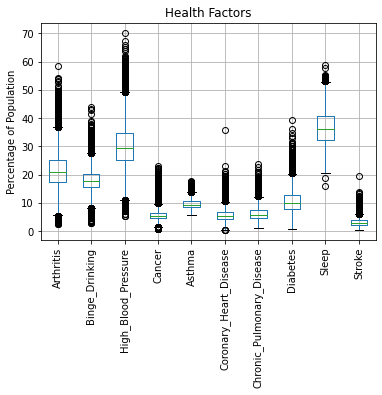

In [55]:
hdes.boxplot()
plt.title('Health Factors')
plt.xticks(rotation='vertical')
plt.ylabel('Percentage of Population')

Figure 9: Box and whisker plots for all of the health variables. Stroke has the lowest median while sleep has the highest. However, high blood pressure has several high outliers indicating that some cities have very high rates of high blood pressure around 70%.